In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [3]:
from scipy.stats import uniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [7]:
data = pd.read_csv('breast-cancer-wisconsin.csv',header=None)

#set column names
data.columns = ['Sample Code Number','Clump Thickness','Uniformity of Cell Size',
                'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

data.head()

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
data.shape

(699, 11)

In [10]:
#Data cleaning
data = data.drop(['Sample Code Number'],axis=1) #Drop 1st column
data = data[data['Bare Nuclei'] != '?'] #Remove rows with missing data
data['Class'] = np.where(data['Class'] == 2,0,1) #Change the Class representation
data.head() #View top 10 rows

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [11]:
#Split data into attributes and class
X = data.drop(['Class'],axis=1)
y = data['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = clf.predict(X_test)

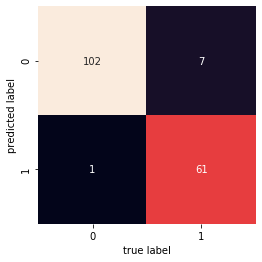

In [15]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
accuracy_score(y_test, y_pred)

0.9532163742690059

In [17]:
recall_score(y_test, y_pred)

0.8970588235294118

In [18]:
precision_score(y_test, y_pred)

0.9838709677419355

In [19]:
values = {'penalty': ['l1', 'l2'], 'C': uniform(loc=0, scale=4)}

In [20]:
clf = LogisticRegression()
random_clf = RandomizedSearchCV(clf, param_distributions=values, scoring='recall')

In [21]:
random_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f17d094d1d0>,
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   r

In [22]:
random_clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'iid': 'deprecated',
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'penalty': ['l1', 'l2'],
  'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f17

In [23]:
values = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.09, 0.01, .09, 1, 5, 10, 25]}

In [24]:
clf = LogisticRegression()
grid_clf = GridSearchCV(clf, param_grid=values, scoring='recall')

In [25]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.09, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [26]:
grid_clf.best_paras_

{'C': 0.01, 'penalty': 'l2'}

In [44]:
y_pred_grid = grid_clf.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred_grid)

0.9415204678362573

In [29]:
recall_score(y_test, y_pred_grid)

0.8676470588235294

In [32]:
precision_score(y_test, y_pred_grid)

0.9833333333333333

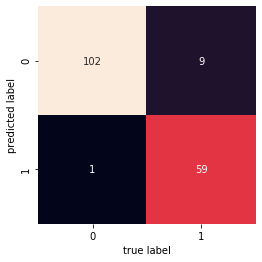

In [33]:
mat = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [34]:
clf = LogisticRegression()
grid_clf = GridSearchCV(clf, param_grid=values, scoring='recall')
kf = KFold(n_splits=5, shuffle=True)

In [35]:
scores, predictions, params = [], [], []
for i in range(5):
    result = next(kf.split(X_train), None)
    X1_train = X_train.iloc[result[0]]
    X1_test = X_train.iloc[result[1]]
    y1_train = y_train.iloc[result[0]]
    y1_test = y_train.iloc[result[1]]
    model = grid_clf.fit(X1_train, y1_train)
    predictions.append(grid_clf.predict(X1_test))
    params.append(model.best_params_)
    scores.append(model.score(X1_test,y1_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [1.0, 0.9487179487179487, 0.9655172413793104, 0.92, 1.0]
Average K-Fold Score : 0.9668470380194517


In [36]:
pprint(params)

[{'C': 5, 'penalty': 'l2'},
 {'C': 0.09, 'penalty': 'l2'},
 {'C': 0.01, 'penalty': 'l2'},
 {'C': 0.09, 'penalty': 'l2'},
 {'C': 0.01, 'penalty': 'l2'}]


In [37]:
clf = LogisticRegression()
grid_clf = GridSearchCV(clf, param_grid=values, scoring='recall')
ovr = OneVsRestClassifier(grid_clf).fit(X_train, y_train)

In [38]:
ovr.get_params()

{'estimator__cv': None,
 'estimator__error_score': nan,
 'estimator__estimator__C': 1.0,
 'estimator__estimator__class_weight': None,
 'estimator__estimator__dual': False,
 'estimator__estimator__fit_intercept': True,
 'estimator__estimator__intercept_scaling': 1,
 'estimator__estimator__l1_ratio': None,
 'estimator__estimator__max_iter': 100,
 'estimator__estimator__multi_class': 'auto',
 'estimator__estimator__n_jobs': None,
 'estimator__estimator__penalty': 'l2',
 'estimator__estimator__random_state': None,
 'estimator__estimator__solver': 'lbfgs',
 'estimator__estimator__tol': 0.0001,
 'estimator__estimator__verbose': 0,
 'estimator__estimator__warm_start': False,
 'estimator__estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
      

In [39]:
ovr.score(X_test, y_test)

0.9415204678362573

In [40]:
clf = LogisticRegression()
grid_clf = GridSearchCV(clf, param_grid=values, scoring='recall', cv=5)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.09, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [41]:
grid_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [42]:
clf = LogisticRegression()
random_clf = RandomizedSearchCV(clf, param_distributions=values, scoring='recall', cv=5)
random_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.09, 0.01, 0.09, 1, 5, 10,
                                              25],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

In [43]:
random_clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'iid': 'deprecated',
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'penalty': ['l1', 'l2'],
  'C': [0.001, 0.09, 0.01, 0.09, 1, 5, 10, 25]},
 'pre_dispatch'